In [89]:
# compare the chi sq values across differnt methods of deblazing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

old_results = pd.read_csv('/mnt_home/azuckerman/BL_APF_DAP/SM_stellar_properties/all_apf/specmatch_results_current.csv') 
AFS_results = pd.read_csv('/mnt_home/azuckerman/BL_APF_DAP/SM_stellar_properties/testing/08Dec2021/specmatch_results_08Dec2021.csv') # using new resample and AFS deblaze
PS_results = pd.read_csv('/mnt_home/azuckerman/BL_APF_DAP/SM_stellar_properties/testing/09Dec2021/specmatch_results_09Dec2021.csv') # using new resample and percentile spline deblaze 
new_resample_results = pd.read_csv('/mnt_home/azuckerman/BL_APF_DAP/SM_stellar_properties/testing/10Dec2021/specmatch_results_10Dec2021.csv') # using new resample and percentile spline deblaze

Mean chi square values (including outliers):
   Old resampling, Bstars: 23.271
   New resampling, Bstars: 11.472
   New resampling, AFS: 24487.483
   New resampling, Percentile: 1058.761
Mean chi square values (excluding outliers greater than chi sq of 1000):
   Old resampling, Bstars: 23.271
   New resampling, Bstars: 11.472
   New resampling, AFS: 54.927         (4 above 1000).
   New resampling, Percentile: 72.003  (5 above 1000).
Mean chi square values (excluding outliers greater than chi sq of 1000):
   Old resampling, Bstars: 11.553
   New resampling, Bstars: 9.184
   New resampling, AFS: 24.746         (6 above 100).
   New resampling, Percentile: 17.898  (11 above 100).


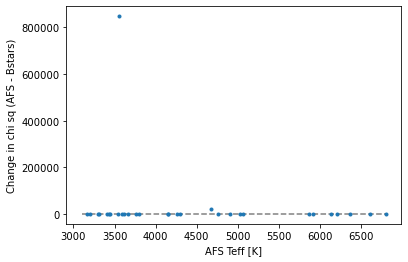

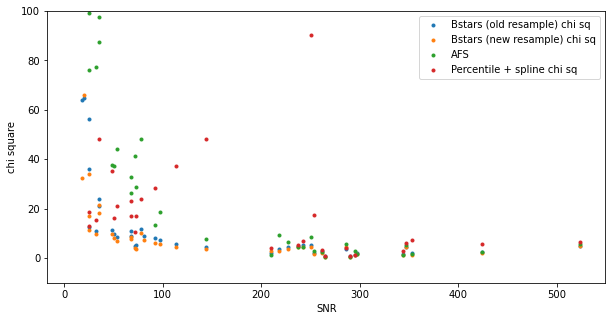

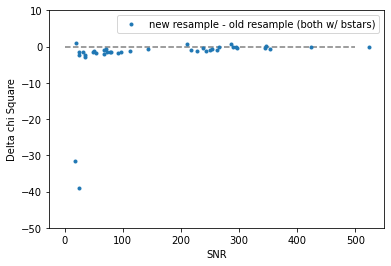

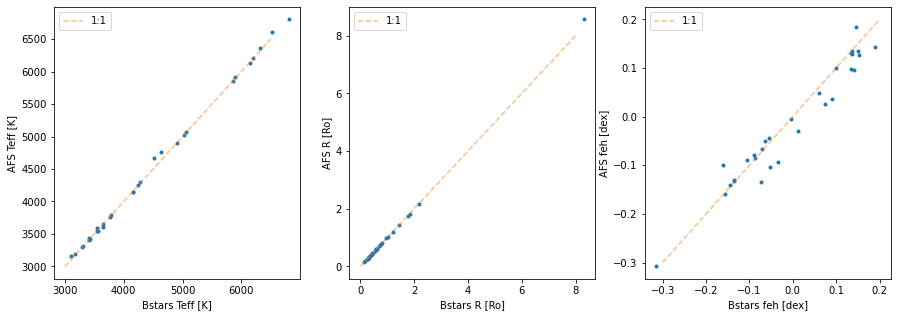

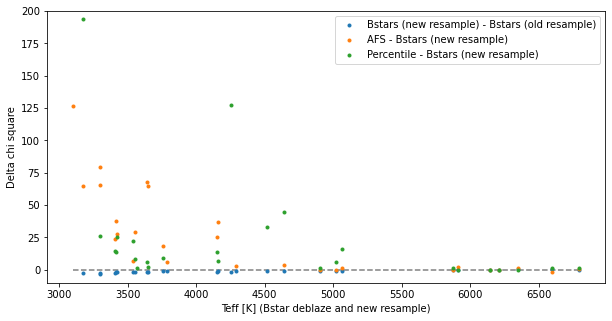

In [128]:
AFS_chi_sq = []
PS_chi_sq = []
7
old_results = pd.read_csv('/mnt_home/azuckerman/BL_APF_DAP/SM_stellar_properties/all_apf/specmatch_results_current.csv') 
8
AFS_results = pd.read_csv('/mnt_home/azuckerman/BL_APF_DAP/SM_stellar_properties/testing/08Dec2021/specmatch_results_08Dec2021.csv') # using new resample and AFS deblaze
9
PS_results = pd.read_csv('/mnt_home/azuckerman/BL_APF_DAP/SM_stellar_properties/testing/09Dec2021/specmatch_results_09Dec2021.csv') # using new resample and percentile spline deblaze 
10
new_resample_results = pd.read_csv('/mnt_home/azuckerman/BL_APF_DAP/SM_stellar_properties/testing/10Dec2021/specmatch_results_10Dec2021.csv') # using new resample and percentile spline deblaze
1
AFS_chi_sq = []
2
PS_chi_sq = []
old_chi_sq = []
new_resample_chi_sq = []
AFS_Teff = []
PS_Teff = []
old_Teff = []
new_resample_Teff = []
AFS_R = []
PS_R = []
old_R = []
new_resample_R = []
AFS_feh = []
PS_feh = []
old_feh = []
new_resample_feh = []
SNR = []

for i in range(len(AFS_results)):
    filenames = AFS_results['filenames'][i] # compare by set of files used
    #AFS
    AFS_chi_sq += [AFS_results['best_mean_chi_squared'][i]]
    AFS_Teff += [AFS_results['iso_Teff'][i]]
    AFS_R += [AFS_results['iso_radius'][i]]
    SNR += [AFS_results['SNR'][i]]
    AFS_feh += [AFS_results['iso_feh'][i]]
    #Bstars and old resampling (and comsic ray remvoal turned on)
    old_row = old_results[old_results['filenames'] == filenames]
    old_chi_sq += [list(old_row['best_mean_chi_squared'])[0]]
    old_Teff += [list(old_row['iso_Teff'])[0]]
    old_R += [list(old_row['iso_radius'])[0]]
    old_feh += [list(old_row['iso_feh'])[0]]  
    #PS
    PS_row = PS_results[PS_results['filenames'] == filenames]
    PS_chi_sq += [list(PS_row['best_mean_chi_squared'])[0]]
    PS_Teff += [list(PS_row['iso_Teff'])[0]]
    PS_R += [list(PS_row['iso_radius'])[0]]
    PS_feh += [list(PS_row['iso_feh'])[0]]   
    # Bstars and new resampling (and comsic ray remvoal turned off)
    new_resample_row = new_resample_results[new_resample_results['filenames'] == filenames]
    new_resample_chi_sq += [list(new_resample_row['best_mean_chi_squared'])[0]]
    new_resample_Teff += [list(new_resample_row['iso_Teff'])[0]]
    new_resample_R += [list(new_resample_row['iso_radius'])[0]]
    new_resample_feh += [list(new_resample_row['iso_feh'])[0]]  
    
AFS_chi_sq = np.array(AFS_chi_sq)
old_chi_sq = np.array(old_chi_sq)
PS_chi_sq = np.array(PS_chi_sq)
new_resample_chi_sq = np.array(new_resample_chi_sq)
delta_chi_sq = AFS_chi_sq - old_chi_sq
plt.figure()
plt.plot(AFS_Teff, delta_chi_sq, '.')
#plt.ylim([-10,1000])
plt.hlines([0.0], xmin = 3100, xmax = 6800, ls = 'dashed', alpha = 0.5)
plt.xlabel('AFS Teff [K]'); plt.ylabel('Change in chi sq (AFS - Bstars)')

plt.figure(figsize = [10,5])
#plt.subplot(321)
#plt.plot(SNR, delta_chi_sq, '.')
#plt.ylim([-10,100])
#plt.hlines([0.0], xmin = 0, xmax = 500, ls = 'dashed', alpha = 0.5)
#plt.xlabel('SNR'); plt.ylabel('Change in chi sq (AFS - Bstars)')
#plt.subplot(323)
plt.plot(SNR, old_chi_sq, '.', label = 'Bstars (old resample) chi sq')
plt.plot(SNR, new_resample_chi_sq, '.', label = 'Bstars (new resample) chi sq')
plt.plot(SNR, AFS_chi_sq, '.', label = 'AFS')
plt.plot(SNR, PS_chi_sq, '.', label = 'Percentile + spline chi sq')
plt.ylim([-10,100])
#plt.hlines([0.0], xmin = 0, xmax = 500, ls = 'dashed', alpha = 0.5)
#plt.xlabel('SNR'); plt.ylabel('AFS chi sq')
#plt.subplot(321)
#plt.ylim([-10,100])
#plt.hlines([0.0], xmin = 0, xmax = 500, ls = 'dashed', alpha = 0.5)
#plt.xlabel('SNR'); plt.ylabel('Bstars (old resample) chi sq')
#plt.subplot(324)
#plt.ylim([-10,100])
#plt.hlines([0.0], xmin = 0, xmax = 500, ls = 'dashed', alpha = 0.5)
#plt.xlabel('SNR'); plt.ylabel('Percentile + spline chi sq')
#plt.subplot(322)
#plt.hlines([0.0], xmin = 0, xmax = 500, ls = 'dashed', alpha = 0.5)
#plt.xlabel('SNR'); plt.ylabel('Bstars (new resample) chi sq')
plt.xlabel('SNR'); plt.ylabel('chi square')
plt.legend()

plt.figure()
plt.plot(SNR, new_resample_chi_sq - old_chi_sq,'.', label = 'new resample - old resample (both w/ bstars)')
plt.xlabel('SNR'); plt.ylabel('Delta chi Square')
plt.hlines([0.0], xmin = 0, xmax = 500, ls = 'dashed', alpha = 0.5)
plt.ylim([-50,10]); plt.legend()

plt.figure(figsize = [15,5])
plt.subplot(131)
plt.plot(old_Teff, AFS_Teff, '.')
plt.plot([3000,6500],[3000,6500], ls  = 'dashed', alpha = 0.5, label = '1:1')
plt.xlabel('Bstars Teff [K]'); plt.ylabel('AFS Teff [K]'); plt.legend()
plt.subplot(132)
plt.plot(old_R, AFS_R, '.')
plt.plot([0,8],[0,8], ls  = 'dashed', alpha = 0.5, label = '1:1')
plt.xlabel('Bstars R [Ro]'); plt.ylabel('AFS R [Ro]'); plt.legend()
plt.subplot(133)
plt.plot(old_feh, AFS_feh, '.')
plt.plot([-0.3,0.2],[-0.3,0.2], ls  = 'dashed', alpha = 0.5, label = '1:1')
plt.xlabel('Bstars feh [dex]'); plt.ylabel('AFS feh [dex]'); plt.legend()


plt.figure(figsize = [10,5])
#plt.plot(new_resample_Teff, old_chi_sq, '.', label = 'Bstars (old resample) chi sq')
plt.plot(new_resample_Teff, new_resample_chi_sq - old_chi_sq, '.', label = 'Bstars (new resample) - Bstars (old resample)')
plt.plot(new_resample_Teff, AFS_chi_sq - new_resample_chi_sq, '.', label = 'AFS - Bstars (new resample)')
plt.plot(new_resample_Teff, PS_chi_sq - new_resample_chi_sq, '.', label = 'Percentile - Bstars (new resample)')
plt.ylim([-10,200])
plt.hlines([0.0], xmin = 3100, xmax = 6800, ls = 'dashed', alpha = 0.5)
plt.xlabel('Teff [K] (Bstar deblaze and new resample)'); plt.ylabel('Delta chi square')
plt.legend()

print('Mean chi square values (including outliers):')
print('   Old resampling, Bstars: ' + str(np.round(np.nanmean(old_chi_sq),3)))
print('   New resampling, Bstars: ' + str(np.round(np.nanmean(new_resample_chi_sq),3)))
print('   New resampling, AFS: ' + str(np.round(np.nanmean(AFS_chi_sq),3)))
print('   New resampling, Percentile: ' + str(np.round(np.nanmean(PS_chi_sq),3)))

num_above_1000_AFS =str(len(AFS_chi_sq[AFS_chi_sq > 1000]))
num_above_1000_PS = str(len(PS_chi_sq[PS_chi_sq > 1000]))

print('Mean chi square values (excluding outliers greater than chi sq of 1000):')
print('   Old resampling, Bstars: ' + str(np.round(np.nanmean(old_chi_sq[old_chi_sq < 1000]),3)))
print('   New resampling, Bstars: ' + str(np.round(np.nanmean(new_resample_chi_sq[new_resample_chi_sq < 1000]),3)))
print('   New resampling, AFS: ' + str(np.round(np.nanmean(AFS_chi_sq[AFS_chi_sq < 1000]),3)) + '         (' + num_above_1000_AFS + ' above 1000).')
print('   New resampling, Percentile: ' + str(np.round(np.nanmean(PS_chi_sq[PS_chi_sq < 1000]),3)) + '  (' + num_above_1000_PS + ' above 1000).')

num_above_100_AFS =str(len(AFS_chi_sq[AFS_chi_sq > 100]))
num_above_100_PS = str(len(PS_chi_sq[PS_chi_sq > 100]))

print('Mean chi square values (excluding outliers greater than chi sq of 1000):')
print('   Old resampling, Bstars: ' + str(np.round(np.nanmean(old_chi_sq[old_chi_sq < 100]),3)))
print('   New resampling, Bstars: ' + str(np.round(np.nanmean(new_resample_chi_sq[new_resample_chi_sq < 100]),3)))
print('   New resampling, AFS: ' + str(np.round(np.nanmean(AFS_chi_sq[AFS_chi_sq < 100]),3)) + '         (' + num_above_100_AFS + ' above 100).')
print('   New resampling, Percentile: ' + str(np.round(np.nanmean(PS_chi_sq[PS_chi_sq < 100]),3)) + '  (' + num_above_100_PS + ' above 100).')


In [118]:
AFS_chi_sq[AFS_chi_sq > 1000]

array([ 17889.99,  92497.91, 848322.56,  18811.5 ])

In [119]:
PS_chi_sq[PS_chi_sq > 1000]

array([ 7925.85, 20027.28,  9322.61,  1126.87,  2414.46])